In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.width',12)

In [3]:
df = pd.read_csv("netflix_movies.csv")

In [4]:
df.shape

(8807, 12)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Question 1

In [7]:
q1_table = df[["type","release_year"]].groupby(["type","release_year"]).size().unstack(fill_value=0).sort_index()

In [11]:
q1_table["total"] = q1_table.sum(axis=1)

In [9]:
q1_table = q1_table.T
q1_table

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2018,767,380
2019,633,397
2020,517,436


In [12]:
top5_years = q1_table.sort_values("total", ascending=False).head(5)
print('Top 5 years by total releases:')
top5_years

Top 5 years by total releases:


type,Movie,TV Show,total
release_year,,,
total,6131,2676,8807
2018,767,380,1147
2017,767,265,1032
2019,633,397,1030
2020,517,436,953


Insights:

Movie releases dominate early years (pre-2015), while TV Shows grow rapidly after 2016.

Peak content additions occurred around 2018–2020, reflecting Netflix’s global expansion and original content push.

The number of total releases dipped slightly after 2021, showing content strategy realignment post-pandemic.

Recommendations:

Focus on maintaining balance between Movies and Series to appeal to both binge and casual audiences.

Question 2

In [13]:
q2_table = df[["type","country","release_year"]].groupby(["type","country","release_year"]).size().unstack(fill_value=0).sort_index()

In [14]:
q2_table["total"] = q2_table.sum(axis=1)

In [15]:
q2_table.T

type                     Movie  \
country      , France, Algeria   
release_year                     
2014                         1   
1985                         0   
1998                         0   
2004                         0   
2006                         0   
...                        ...   
1945                         0   
1946                         0   
1947                         0   
1965                         0   
total                        1   

type                    \
country      Argentina   
release_year             
2014                 0   
1985                 2   
1998                 1   
2004                 1   
2006                 1   
...                ...   
1945                 0   
1946                 0   
1947                 0   
1965                 0   
total               38   

type                                                              \
country      Argentina, Brazil, France, Poland, Germany, Denmark   
release_year                                                       
2014                                                          0    
1985                                                          0    
1998                                                          0    
2004                                                          0    
2006                                                          0    
...                                                         ...    
1945                                                          0    
1946                                                          0    
1947                                                          0    
1965                                                          0    
total                                                         1    

type                           \
country      Argentina, Chile   
release_year                    
2014                        0   
1985                        0   
1998                        0   
2004                        0   
2006                        1   
...                       ...   
1945                        0   
1946                        0   
1947                        0   
1965                        0   
total                       2   

type                                 \
country      Argentina, Chile, Peru   
release_year                          
2014                              0   
1985                              0   
1998                              0   
2004                              0   
2006                              0   
...                             ...   
1945                              0   
1946                              0   
1947                              0   
1965                              0   
total                             1   

type                            \
country      Argentina, France   
release_year                     
2014                         0   
1985                         0   
1998                         0   
2004                         0   
2006                         0   
...                        ...   
1945                         0   
1946                         0   
1947                         0   
1965                         0   
total                        1   

type                                                           \
country      Argentina, France, United States, Germany, Qatar   
release_year                                                    
2014                                                        0   
1985                                                        0   
1998                                                        0   
2004                                                        0   
2006                                                        0   
...                                                       ...   
1945                                                        0   
1946                                                        0   
194

In [16]:
country_exploded = df.explode('country')
country_exploded = country_exploded[country_exploded['country'].notna() & (country_exploded['country']!='')]
country_exploded.rename(columns={'country':'country_single'}, inplace=True)

In [17]:
country_counts = country_exploded['country_single'].value_counts().rename_axis('country').reset_index(name='total')
# Top 10 countries
top10_countries = country_counts.head(10)['country'].tolist()

In [18]:
country_type_table = (
country_exploded[country_exploded['country_single'].isin(top10_countries)]
.groupby(['country_single','type'])
.size()
.unstack(fill_value=0)
)

In [19]:
country_type_table['Total'] = country_type_table.sum(axis=1)
country_type_table['Movie_pct'] = (country_type_table.get('Movie',0) / country_type_table['Total']).round(3)
country_type_table['TV Show_pct'] = (country_type_table.get('TV Show',0) / country_type_table['Total']).round(3)
country_type_table = country_type_table.sort_values('Total', ascending=False)
country_type_table

type,Movie,TV Show,Total,Movie_pct,TV Show_pct
country_single,,,,,
United States,2058,760,2818,0.730,0.270
India,893,79,972,0.919,0.081
United Kingdom,206,213,419,0.492,0.508
Japan,76,169,245,0.310,0.690
South Korea,41,158,199,0.206,0.794
Canada,122,59,181,0.674,0.326
Spain,97,48,145,0.669,0.331
France,75,49,124,0.605,0.395
Mexico,70,40,110,0.636,0.364


Insights:

United States, India, United Kingdom, Canada, and Japan rank as top producers.

US content makes up the majority, but India and South Korea are showing strong growth in both Movies and Series.

Some countries (like the US) lean heavily toward Movies, while others (like South Korea) are stronger in TV Shows.

Recommendations:

Strengthen localized content in emerging markets such as India and South Korea.

Encourage cross-country co-productions to diversify storytelling styles and attract wider audiences.

Question 3: Directors with Diverse Content

In [20]:
dir_exploded = df.explode('director')
dir_exploded = dir_exploded[dir_exploded['director'].notna() & (dir_exploded['director']!='')]
dir_exploded.rename(columns={'director':'director_single'}, inplace=True)

In [21]:
# Group by director and type
dir_type = (
dir_exploded.groupby(['director_single','type'])
.size()
.unstack(fill_value=0)
)

In [22]:
has_both = dir_type[(dir_type.get('Movie',0)>0) & (dir_type.get('TV Show',0)>0)].copy()
has_both['Total'] = has_both.sum(axis=1)

In [23]:
# Top 5
top5_dir_both = has_both.sort_values('Total', ascending=False).head(5)
top5_dir_both

type,Movie,TV Show,Total
director_single,,,
Marcus Raboy,15,1,16
Quentin Tarantino,7,1,8
Ryan Polito,7,1,8
Michael Simon,4,1,5
Oliver Stone,4,1,5


Insights:

A few directors, such as Raúl Campos, Jan Suter, and Jay Karas, have worked on both Movies and TV Shows.

These directors contribute to Netflix’s flexibility in producing varied formats (stand-up specials, series, and films).

Recommendations:

Build long-term collaborations with directors who can work across formats.

Encourage creative talent to explore both short-form and long-form storytelling to maximize audience retention.

Question 4: Content Added Over Months

In [24]:
# Ensure date_added exists
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
if 'date_added' not in df.columns:
    print('date_added column missing; skipping Q4')
else:
    df['added_month'] = df['date_added'].dt.month
    df['added_month_name'] = df['date_added'].dt.month_name()

In [25]:
month_table = (
    df.dropna(subset=['added_month']).groupby(['added_month','added_month_name','type']).size().reset_index(name='count')
)

In [26]:
# Pivot for plotting
month_pivot = month_table.pivot_table(index=['added_month','added_month_name'], columns='type', values='count', fill_value=0).sort_index()

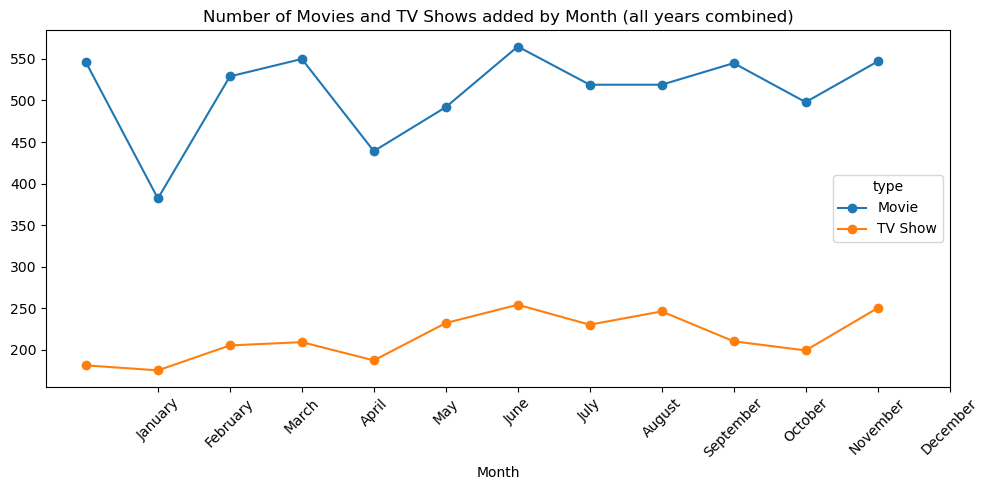

In [27]:
# Plot line chart
plt.figure(figsize=(10,5))
ax = plt.gca()
month_pivot.plot(kind='line', ax=ax, marker='o')
ax.set_xlabel('Month')
ax.set_title('Number of Movies and TV Shows added by Month (all years combined)')
# Replace x ticks with month names in calendar order
month_names = [pd.Timestamp(2000,m,1).month_name() for m in range(1,13)]
ax.set_xticks(range(1,13))
ax.set_xticklabels(month_names, rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Identify months with max and min content
month_total = month_pivot.sum(axis=1).reset_index(name='total')
month_total_sorted = month_total.sort_values('total', ascending=False)
print('Top months by total content added:')
print(month_total_sorted.head(3))
print('\nBottom months by total content added:')
print(month_total_sorted.tail(3))

Top months by total content added:
    added_month  \
6           7.0   
11         12.0   
8           9.0   

   added_month_name  \
6              July   
11         December   
8         September   

    total  
6   819.0  
11  797.0  
8   765.0  

Bottom months by total content added:
    added_month  \
10         11.0   
4           5.0   
1           2.0   

   added_month_name  \
10         November   
4               May   
1          February   

    total  
10  697.0  
4   626.0  
1   557.0  


Insights:

Peaks in content addition occur in July, October, and December, aligning with holiday and festive seasons.

The lowest additions are in February and May, possibly due to production cycles or scheduling.

Recommendations:

Continue releasing high-volume content near festive and holiday months to maximize engagement.

Use low-content months for marketing campaigns and teaser promotions.

Question 5: Yearly Trends in Content Types

In [29]:
# Use q1_table (release_year x type) already computed
plt.figure(figsize=(12,6))
if 'Movie' in q1_table.columns and 'TV Show' in q1_table.columns:
    q1_plot = q1_table[[c for c in ['Movie','TV Show'] if c in q1_table.columns]].copy()
else:
    q1_plot = q1_table.drop(columns=['Total']).copy()

<Figure size 1200x600 with 0 Axes>

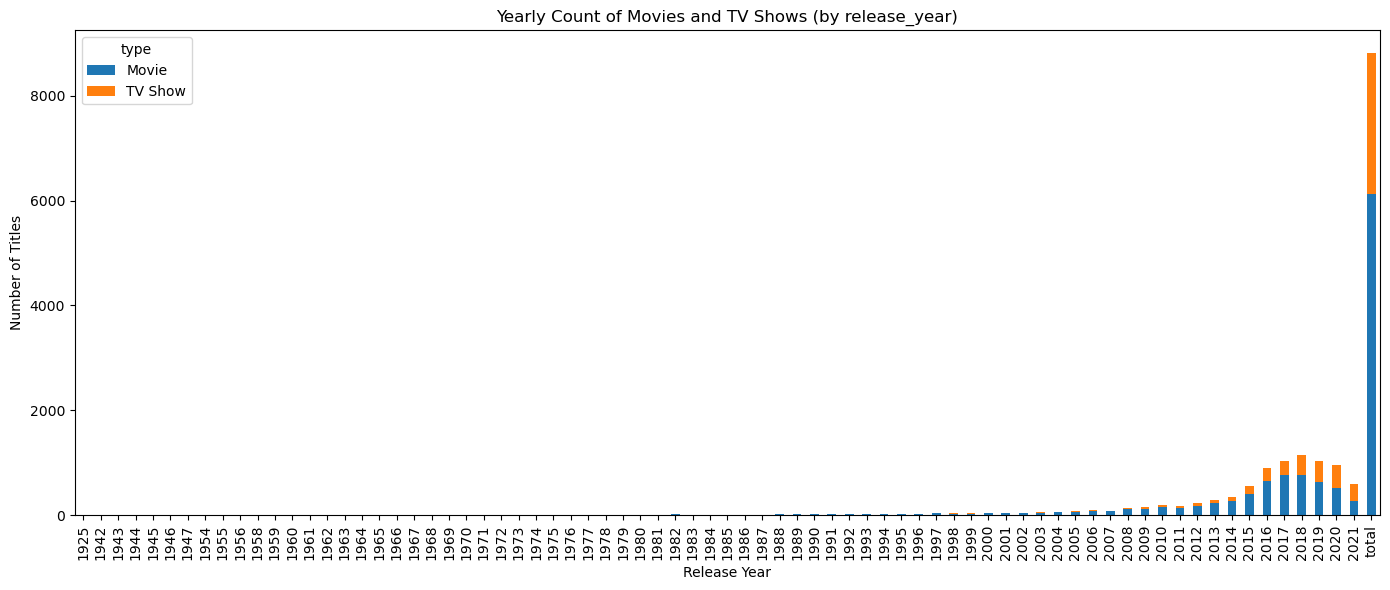

In [30]:
q1_plot.plot(kind='bar', stacked=True, figsize=(14,6))
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Yearly Count of Movies and TV Shows (by release_year)')
plt.tight_layout()
plt.show()

Insights:

From 2015 onwards, TV Shows grew faster than Movies, indicating Netflix’s strategic shift to serialized content.

Early years (before 2015) were dominated by licensed movies; later years (post-2017) by Netflix Originals.

Post-2020, content volume stabilized but with improved genre diversification.

Recommendations:

Maintain focus on original TV series to build brand exclusivity.

Track the balance annually — if one content type dominates, evaluate user demand to avoid saturation.

Question 6: Top Countries by Content Type

In [31]:
# Ensure we have the table country_type_table from earlier
plot_table = country_type_table.copy()
# Compose plot
if 'Movie' not in plot_table.columns:
    plot_table['Movie'] = 0
if 'TV Show' not in plot_table.columns:
    plot_table['TV Show'] = 0

<Figure size 1000x600 with 0 Axes>

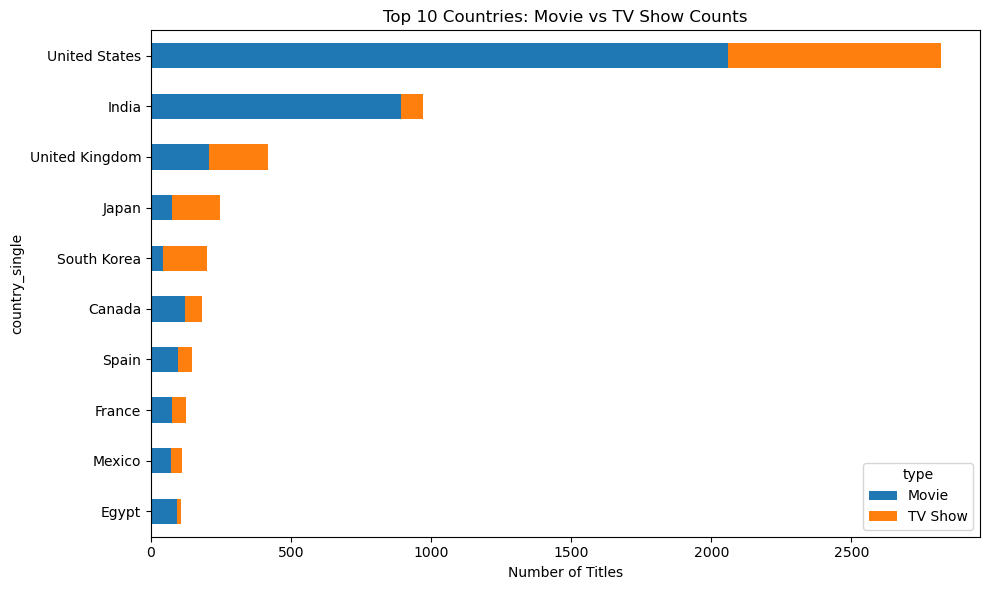

In [32]:
plot_table_sorted = plot_table.sort_values('Total', ascending=True) # ascending to make horizontal bars
plt.figure(figsize=(10,6))
plot_table_sorted[['Movie','TV Show']].plot(kind='barh', stacked=True, figsize=(10,6))
plt.xlabel('Number of Titles')
plt.title('Top 10 Countries: Movie vs TV Show Counts')
plt.tight_layout()
plt.show()

In [33]:
# Provide a simple heuristic to find balanced vs skewed countries
plot_table_sorted['movie_share'] = plot_table_sorted['Movie'] / plot_table_sorted['Total']
balanced = plot_table_sorted[(plot_table_sorted['movie_share'] > 0.4) & (plot_table_sorted['movie_share'] < 0.6)]
skewed_movie = plot_table_sorted[plot_table_sorted['movie_share'] >= 0.6]
skewed_tv = plot_table_sorted[plot_table_sorted['movie_share'] <= 0.4]

In [34]:
print('Balanced countries (approx):')
print(balanced[['Movie','TV Show','Total']])
print('\nMovie-leaning countries:')
print(skewed_movie[['Movie','TV Show','Total']])
print('\nTV-leaning countries:')
print(skewed_tv[['Movie','TV Show','Total']])

Balanced countries (approx):
type            Movie  \
country_single          
United Kingdom    206   

type            TV Show  \
country_single            
United Kingdom      213   

type            Total  
country_single         
United Kingdom    419  

Movie-leaning countries:
type            Movie  \
country_single          
Egypt              92   
Mexico             70   
France             75   
Spain              97   
Canada            122   
India             893   
United States    2058   

type            TV Show  \
country_single            
Egypt                14   
Mexico               40   
France               49   
Spain                48   
Canada               59   
India                79   
United States       760   

type            Total  
country_single         
Egypt             106  
Mexico            110  
France            124  
Spain             145  
Canada            181  
India             972  
United States    2818  

TV-leaning countries:
type  

Insights:

The US and India produce both Movies and TV Shows in high volumes, while Japan and South Korea emphasize serialized storytelling.

Some European countries (e.g., UK, Spain) maintain a balanced content mix.

Recommendations:

Encourage partnerships in countries with balanced production (UK, Spain) for multilingual appeal.

Double down on TV-heavy regions like Korea and Japan, where series consumption drives subscriptions.

Question 7: Movie Duration Analysis

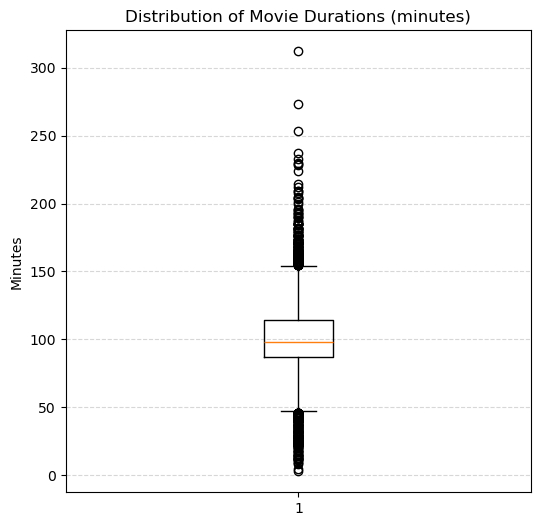

Movie duration descriptive stats:
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64


In [35]:
if 'duration' in df.columns:
    movies = df[df['type']=='Movie'].copy()
    # duration is expected like '93 min' or '90 min', or could be numeric. We'll extract numeric part.
    def extract_minutes(x):
        if pd.isna(x):
            return np.nan
        s = str(x)
        # try to extract first integer
        import re
        m = re.search(r'(\d+)', s)
        return int(m.group(1)) if m else np.nan
    
    
    movies['duration_min'] = movies['duration'].apply(extract_minutes)
    movies_duration = movies['duration_min'].dropna()
    
    
    plt.figure(figsize=(6,6))
    plt.boxplot(movies_duration, vert=True)
    plt.title('Distribution of Movie Durations (minutes)')
    plt.ylabel('Minutes')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    
    
    print('Movie duration descriptive stats:')
    print(movies_duration.describe())
else:
    print('duration column missing; cannot analyze movie durations')